In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import moviepy.video.io.ImageSequenceClip
import netCDF4 as nc4
from matplotlib.gridspec import GridSpec

import cmocean
from datetime import datetime, timedelta

from sipbuild.generator.outputs.formatters import variable

# Analyzing Result and Answering Scientific Question

## Scientific question: How do seasonal monsoons in southeast Asia impact ocean stratification?

Due to the data availability and model configuration (start date is January 15th of each year), our model has data from January to November. However, the monsoon season in Southeast Asia are:

- Southwest Monsoon: May to October
- Northeast Monsoon: November to April

With that being said, our data missing out 1 month of the Northeast monsoon season. So, we will use January month as the representative of Northeast Monsoon season and July as the representative of Southeast Monsoon season in our analysis.

In [3]:
# Declare constant for functions
n_rows = 360
n_cols = 180
data_path = '/Volumes/T7/IceBerg/with_ice_berg/run/diags'
years = ['1992']

# Use only those files per our interests

In [26]:
file_types = [file_type for file_type in os.listdir(data_path) if not file_type.startswith('._')]
file_types

['Theta_AW',
 'Salt_AW',
 'Theta_surf',
 'Salt_surf',
 'SIarea',
 'SIheff',
 'SIhsnow',
 'SIuice',
 'SIvice',
 'Vvel_AW',
 'Uvel_AW',
 'Uvel_surf',
 'Vvel_surf',
 'EtaN']

# Function to make movie

Here is the function for quick making movies (Inherent from Professor Mike Wood's Lecture 8-1)

In [27]:
# make a list of files for each movie panel
def extract_time(filename):
    # Extract the date part of the filename
    checkpoint = filename[:-4]  # Extracting the date portion
    # Convert to datetime object
    return int(checkpoint)

def get_full_path_list(file_type):
    frames_folder = os.path.join(file_type)
    files = [f for f in os.listdir(frames_folder) if not f.startswith("._")]
    sorted_files = sorted(files, key=extract_time)
    full_paths = [os.path.join(frames_folder, filename) for filename in sorted_files]
    return full_paths

def create_movie(frame_folder, fps):
    full_paths = get_full_path_list(frame_folder)
    # use the ImageSequenceClip module to set up the clip
    clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(full_paths, fps=fps)
    
    # write the video to a file
    clip.write_videofile(os.path.join(frame_folder + '.mp4'), fps=fps)

In [28]:
os.listdir(data_path)

['Theta_AW',
 '._Theta_AW',
 'Salt_AW',
 '._Salt_AW',
 'Theta_surf',
 '._Theta_surf',
 'Salt_surf',
 '._Salt_surf',
 'SIarea',
 '._SIarea',
 'SIheff',
 '._SIheff',
 'SIhsnow',
 '._SIhsnow',
 'SIuice',
 '._SIuice',
 'SIvice',
 '._SIvice',
 'Vvel_AW',
 '._Vvel_AW',
 'Uvel_AW',
 '._Uvel_AW',
 'Uvel_surf',
 '._Uvel_surf',
 'Vvel_surf',
 '._Vvel_surf',
 'EtaN',
 '._EtaN']

In [29]:
os.path.join(data_path, file_types[0])

'/Volumes/T7/output/run/diags/daily_snapshot/Theta_AW'

In [30]:
# plot_grid = np.ma.masked_where(Theta_AW == 0.0, Theta_AW)

In [31]:
variable_metadata = {
    "EtaN": {"vmin": -2.9, "vmax": 2.3, "cmap": "viridis"},
    # "SIarea": {"vmin": 0, "vmax": 1, "cmap": "cmo.ice"},  # Sea ice concentration (0-1)  
    # "SIheff": {"vmin": 0, "vmax": 5, "cmap": "cmo.ice"},  # Sea ice thickness (m)
    # "SIhsnow": {"vmin": 0, "vmax": 2, "cmap": "cmo.ice"},  # Snow depth on sea ice (m)
    # "SIvice": {"vmin": -0.5, "vmax": 0.5, "cmap": "cmo.balance"},  # Sea ice velocity
    # "SIuice": {"vmin": -0.5, "vmax": 0.5, "cmap": "cmo.balance"},  # Sea ice u-component velocity
    "Salt_surf": {"vmin": 30, "vmax": 40, "cmap": "cmo.haline"},  # Surface salinity (PSU)
    "Theta_surf": {"vmin": -2, "vmax": 30, "cmap": "cmo.thermal"}, # Sea surface temperature (°C)
    "Salt_AW": {"vmin": 30, "vmax": 40, "cmap": "cmo.haline"},  # Atlantic Water salinity (PSU)
    "Theta_AW": {"vmin": -2, "vmax": 30, "cmap": "cmo.thermal"},  # Atlantic Water temperature (°C)
}


In [32]:
variable_list = list(variable_metadata.keys())
for variable in variable_list:
    variable_files = os.listdir(os.path.join(data_path, variable))
    for i in range(len(os.listdir(variable_folder))):
        file = os.listdir(os.path.join(data_path, file_type))[i]
# file_path = os.path.join(data_path, file_type, file)
# file_path

'/Volumes/T7/output/run/diags/daily_snapshot/EtaN/EtaN_199201.nc'

In [12]:

for day in range(31):
    fig = plt.figure(figsize=(15, 12))
    gs = GridSpec(2, 3, wspace=0.8, hspace=0.1,
                  left=0.11, right=0.9, top=0.95, bottom=0.05
                  )
    variable_list = list(variable_metadata.keys())
    for i in range(len(variable_metadata)):
        file_type = variable_list[i]
        file = os.listdir(os.path.join(data_path, file_type))[0]
        file_path = os.path.join(data_path, file_type, file)
        ds = nc4.Dataset(file_path)

        grid = ds.variables[file_type][:, :, :]
        plot_grid = np.ma.masked_where(grid == 0.0, grid)

        ax1 = fig.add_subplot(gs[i])
        C = plt.pcolormesh(plot_grid[day, :, :],
                           vmin=variable_metadata[file_type]['vmin'],
                           vmax=variable_metadata[file_type]['vmax'],
                           cmap=variable_metadata[file_type]['cmap'])

        plt.colorbar(C, label=file_type, fraction=0.026)
    plt.savefig(os.path.join('/Users/eddie/IcebergModeling', 'Output', 'Plots', f'{day}.png'))
    plt.close(fig)


## Circulation Result

Firstly, we will plot and create 2 movies to compare the velocity on the surface level for both 2015 and 2017.

In [43]:
create_movie('/Users/eddie/IcebergModeling/Output/Plots', 2)

Moviepy - Building video /Users/eddie/IcebergModeling/Output/Plots.mp4.
Moviepy - Writing video /Users/eddie/IcebergModeling/Output/Plots.mp4


Moviepy - Done !
Moviepy - video ready /Users/eddie/IcebergModeling/Output/Plots.mp4


In [16]:
import video_maker as vm

config = vm.MovieConfiguration('/Volumes/T7/IceBerg/with_ice_berg/run/diags', '/Volumes/T7/IceBerg/with_ice_berg/visualizations')
config.create_plots('daily_snapshot')
config.create_movie('daily_snapshot', 15)

Creating plot for 1992/01
Creating plot for 1992/02
Creating plot for 1992/03
Creating plot for 1992/04
Creating plot for 1992/05
Creating plot for 1992/06
Creating plot for 1992/07
Creating plot for 1992/08
Creating plot for 1992/09
Creating plot for 1992/10
Creating plot for 1992/11
Creating plot for 1992/12
Successfully created plots for daily_snapshot
Moviepy - Building video /Volumes/T7/IceBerg/with_ice_berg/visualizations/video/daily_snapshot/daily_snapshot_video.mp4.
Moviepy - Writing video /Volumes/T7/IceBerg/with_ice_berg/visualizations/video/daily_snapshot/daily_snapshot_video.mp4


Moviepy - Done !
Moviepy - video ready /Volumes/T7/IceBerg/with_ice_berg/visualizations/video/daily_snapshot/daily_snapshot_video.mp4


Creating plot for 1992/01


ValueError: For X (361) and Y (51) with flat shading, A should have shape (50, 360, 3) or (50, 360, 4) or (50, 360) or (18000,), not (50, 360, 180)

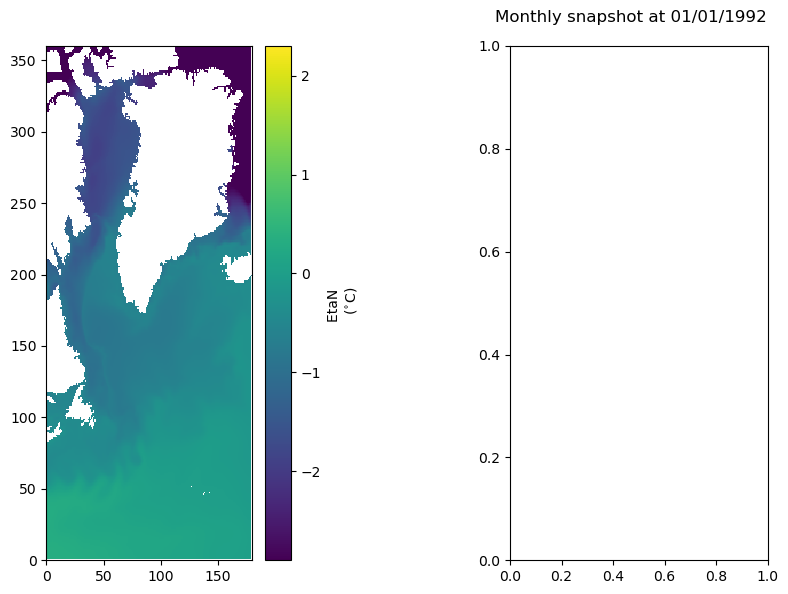

In [1]:
import video_maker as vm

config = vm.MovieConfiguration('/Volumes/T7/IceBerg/no_ice_berg/run/diags', '/Volumes/T7/IceBerg/no_ice_berg/visualizations')
config.create_plots('monthly_snapshot')
config.create_movie('monthly_snapshot')



/Volumes/T7/IceBerg/with_ice_berg/run/diags/iceberg/iceberg.0000002880.bin
(80, 15)


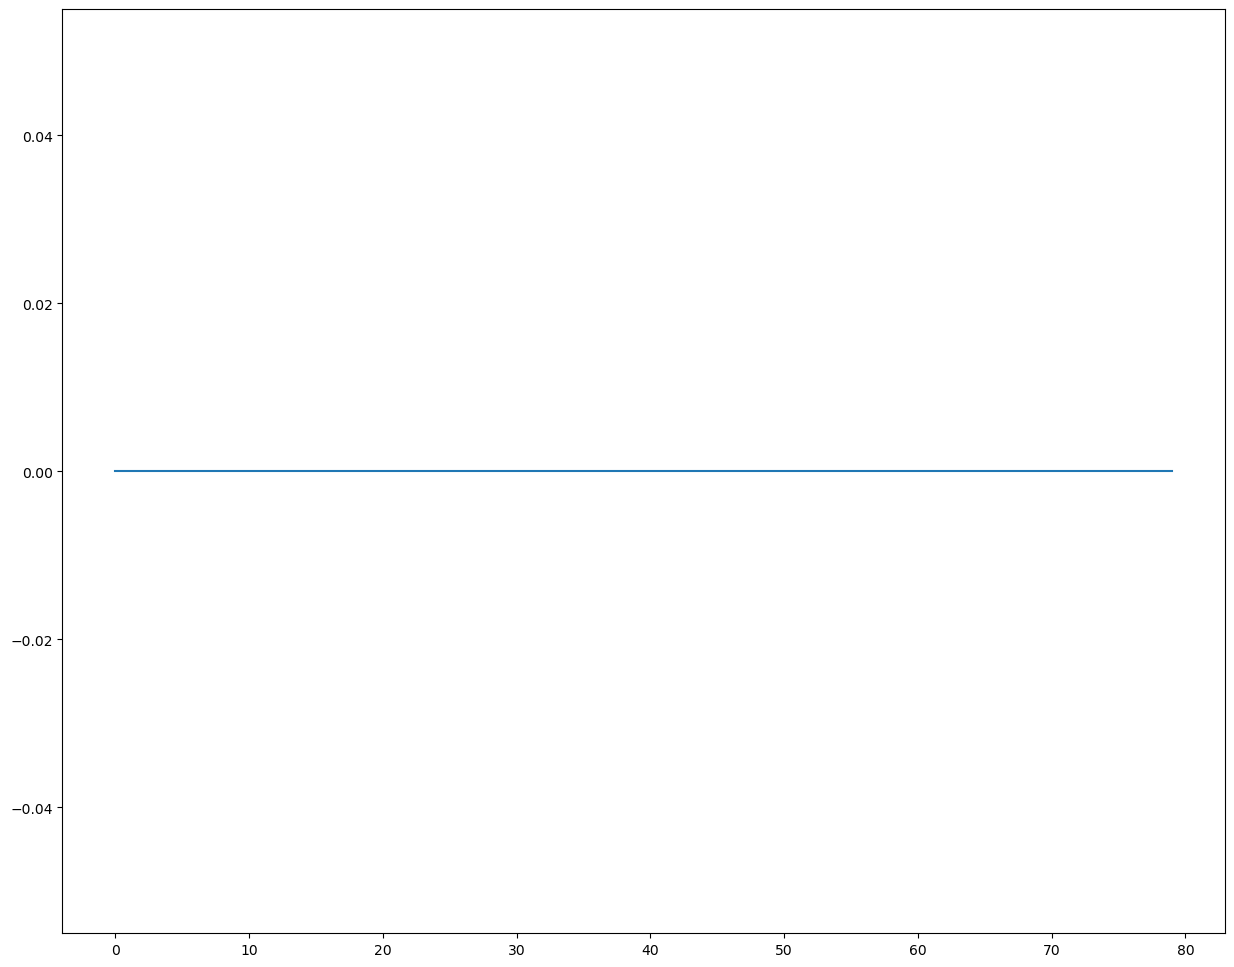

In [5]:
file_type = 'iceberg'
file = os.listdir(os.path.join(data_path, file_type))[-1]
file_path = os.path.join(data_path, file_type, file)
fig = plt.figure(figsize=(15, 12))
gs = GridSpec(2, 3, wspace=0.8, hspace=0.1,
              left=0.11, right=0.9, top=0.95, bottom=0.05
              )
# file_path
ds = np.fromfile(file_path, '>f8').reshape((15, 15000)).T
ds = ds[ds[:,0] != 0,:]
print(file_path)
print(ds.shape)
input_dir = '/Users/eddie/IcebergModeling/Input'
n_rows = 360
n_cols = 180

model_grid = np.fromfile(os.path.join(input_dir,'greenland.mitgrid'),'>f8').reshape((16, n_rows+1, n_cols+1))
# recreate the grids that will be used in the model
XC = model_grid[0,:-1,:-1]
YC = model_grid[1,:-1,:-1]
bathy = np.fromfile(os.path.join(input_dir,'greenland_bathymetry.bin'),'>f4').reshape(np.shape(XC))

# plt.pcolormesh(bathy)
# plt.scatter(ds[:,2], ds[:,3])

plt.plot(ds[:,6])
# grid = ds.variables[file_type][:, :, :]
# plot_grid = np.ma.masked_where(grid == 0.0, grid)

# ax1 = fig.add_subplot(gs[0])
# C = plt.pcolormesh(ds[0, :, :],
#                    vmin=variable_metadata[file_type]['vmin'],
#                    vmax=variable_metadata[file_type]['vmax'],
#                    cmap=variable_metadata[file_type]['cmap'])
# 
# plt.colorbar(C, label=file_type, fraction=0.026)

In [39]:
import pandas as pd
data = np.fromfile(os.path.join('/Users/eddie/IcebergModeling/Notebooks/calving_schedule_003'), '>f8').astype('<f8')

ncols = 4
schedule_length = int(len(data) / ncols)

data = data.reshape((ncols, schedule_length)).T # mean thickness 100 m, time is in seconds relative to model start time (in data.cal)
non_zero = data[~np.any(data == 0, axis=1)]
df_original = pd.DataFrame(data, columns=['Time', 'Width', 'Length', 'Thickness'])
df_non_zero = pd.DataFrame(non_zero, columns=['Time', 'Width', 'Length', 'Thickness'])
df_non_zero['Time'] = df_non_zero['Time']
df_non_zero.set_index('Time', inplace=True)
print(df_non_zero)
# df_non_zero

                  Width      Length   Thickness
Time                                           
86400.0      206.617524  215.617524  224.617524
172800.0     205.269136  214.269136  223.269136
259200.0     204.440113  213.440113  222.440113
345600.0     203.638652  212.638652  221.638652
432000.0     203.320656  212.320656  221.320656
...                 ...         ...         ...
157334400.0  110.716552  113.716552  116.716552
157420800.0  111.695959  114.695959  117.695959
157507200.0  112.018372  115.018372  118.018372
157593600.0  112.499378  115.499378  118.499378
157680000.0  109.952617  112.952617  115.952617

[1824 rows x 3 columns]
